In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 34.9MB/s]


In [4]:
df = pd.read_csv('cars24-data.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [5]:
df.shape

(19820, 18)

# Simple Linear Regression 
## Univariate Linear Regression

In [6]:
X = df['model'].values
y = df['selling_price'].values

In [7]:
X.shape, y.shape

((19820,), (19820,))

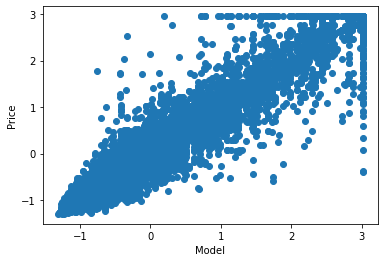

In [8]:
plt.scatter(X, y)
plt.xlabel("Model")
plt.ylabel("Price")
plt.show()

In [9]:
def predict(x, weights):
  # y^ = w1.x + w0
  y_hat = weights[1]*x + weights[0]
  return y_hat

In [10]:
def error(X, Y, weights):
  '''Implementation of MSE'''
  n = X.shape[0] # 19820
  
  total_err = 0.0

  for i in range(n):
    y_hat = predict(X[i], weights)
    total_err += ( Y[i] - y_hat )**2
  
  return total_err/n

In [11]:
def gradient(X, Y, weights):
  n = X.shape[0] # 19820

  grad = np.zeros((2,))

  for i in range(n):
    y_hat = predict(X[i], weights)
    grad[0] += (y_hat - Y[i])
    grad[1] += (y_hat - Y[i])*X[i]

  
  return 2*grad/n

In [12]:
def gradient_descent(X, Y, n_itr = 100, eta = 0.1):
  weights =  np.random.randn(2,)
  error_list = []

  for i in range(n_itr):
    e = error(X,Y, weights)
    error_list.append(e)
    grad = gradient(X, Y, weights)
    weights[0] = weights[0] - eta*grad[0]
    weights[1] = weights[1] - eta*grad[1]

  return weights.round(2), error_list

In [13]:
opt_weights, error_list = gradient_descent(X, y)

In [14]:
opt_weights

array([-0.  ,  0.97])

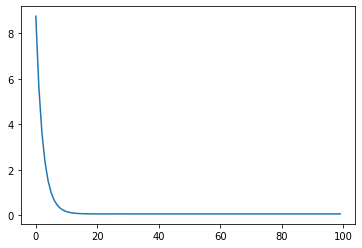

In [15]:
plt.plot(error_list)

In [16]:
x_new = np.array([-1, 3])

predict(-1, opt_weights)
predict(3, opt_weights)

2.91

In [17]:
# (-1, -0.97), (3, 2.91)

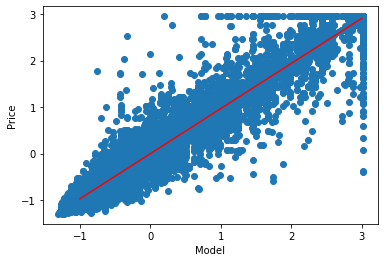

In [18]:

plt.scatter(X, y)
plt.xlabel("Model")
plt.ylabel("Price")

plt.plot([-1, 3], [-0.97, 2.91], c ='red')

plt.show()

## R2 Score

In [19]:
opt_weights

array([-0.  ,  0.97])

In [24]:
y_hat = np.array([predict(point, opt_weights) for point in X])

In [25]:
y_hat[:5]

array([-1.09191218, -0.32323029, -0.76611323, -0.87810662, -0.01270316])

In [26]:
y[:5]

array([-1.11104589, -0.22394353, -0.91505816, -0.89236484, -0.18268296])

In [27]:
def r2_score(y, y_hat):
  num = np.sum((y - y_hat)**2)
  denom = np.sum((y - y.mean())**2)

  return 1 - (num/denom)

In [28]:
r2_score(y, y_hat)

0.9312991715379575

In [30]:
# step -1 import Algorithm
from sklearn.linear_model import LinearRegression

In [31]:
# step -2 create model/object
model = LinearRegression()

In [34]:
X = X.reshape(-1, 1)

In [35]:
# step -3 train/fit model
model.fit(X, y)

LinearRegression()

In [37]:
y_hat = model.predict(X)

In [38]:
y_hat[:5]

array([-1.08634131, -0.32158118, -0.76220457, -0.87362657, -0.01263835])

In [39]:
model.score(X, y)

0.9313236629576508

In [43]:
model.coef_.round(2)

array([0.97])

In [42]:
model.intercept_.round(2)

-0.0

# Multiple Linear Regression

In [49]:
y = df['selling_price'].values
X = df.drop('selling_price', axis=1).values

In [51]:
X.shape

(19820, 17)

In [53]:
y  = y.reshape(-1, 1)
y.shape

(19820, 1)

In [55]:
ones = np.ones((len(X), 1))
X_new = np.hstack((ones, X))
X_new.shape

(19820, 18)

In [ ]:
# X@W
# np.matmul(X,W)
# np.dot(X,W)
# X.dot(W)

In [57]:
def predict(X, W):
  '''
  X : (n,d) it'a input matrix
  W : (d, 1) all the weights
  '''
  return np.dot(X,W)

In [58]:
def error(X, y, W):

  y_hat = predict(X, W)
  err = np.mean((y - y_hat)**2)

  return err

In [59]:
def gradient(X, y, W):
  y_hat = predict(X, W)
  grad = np.dot(X.T , y_hat - y )

  return 2*grad/len(X)

In [122]:
def gradient_descent(X, Y, n_itr = 400, eta = 0.1):
  weights =  np.random.randn(X.shape[1],1)
  error_list = []

  for i in range(n_itr):
    e = error(X,Y, weights)
    error_list.append(e)
    grad = gradient(X, Y, weights)
    weights = weights - eta*grad

  return weights.round(2), error_list

In [123]:
X_new.shape,  y.shape

((19820, 18), (19820, 1))

In [124]:
opt_weights, error_list = gradient_descent(X_new, y)

In [125]:
print(opt_weights)

[[ 0.  ]
 [ 0.19]
 [-0.02]
 [-0.05]
 [ 0.03]
 [ 0.03]
 [ 0.06]
 [ 0.06]
 [ 0.79]
 [-0.02]
 [-0.  ]
 [ 0.01]
 [ 0.01]
 [ 0.  ]
 [-0.03]
 [-0.01]
 [-0.02]
 [-0.03]]


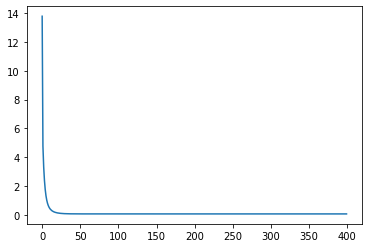

In [126]:
plt.plot(error_list)

In [127]:
error_list[-10:]

[0.057814090747183695,
 0.05781404815289129,
 0.05781400616932907,
 0.05781396478752901,
 0.05781392399865771,
 0.057813883794014184,
 0.057813844165028036,
 0.057813805103257274,
 0.0578137666003865,
 0.057813728648224864]

In [128]:
y_hat = predict(X_new, opt_weights)

In [129]:
def r2_score(y, y_hat):
  num = np.sum((y - y_hat)**2)
  denom = np.sum((y - y.mean())**2)

  return 1 - (num/denom)

In [130]:
r2_score(y, y_hat)

0.942121294327256

In [131]:
y_hat

array([[-1.18662814],
       [-0.29642435],
       [-0.89584055],
       ...,
       [-0.31449048],
       [-0.98791511],
       [ 1.03720729]])